In [1189]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from PIL import Image

np.random.seed(42)

In [1190]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

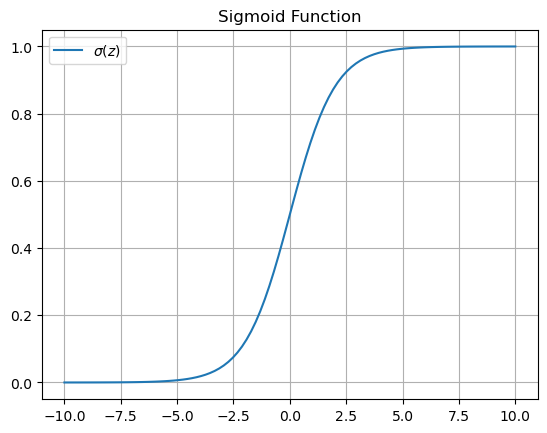

In [1191]:
x=np.linspace(-10,10,100)
plt.plot(x,sigmoid(x), label = fr"$\sigma (z)$")
plt.grid(True)
plt.legend()
plt.title("Sigmoid Function")
plt.show()

In [1192]:
def JFunction(w):
    return (w-4)**2+1
def JDerivative(w):
    return 2*(w-4)

In [1193]:
lr = 1/3
n_iter = 4
w = 1
w_ls = [w]
J_ls = [JFunction(w)]

for i in range(n_iter):
    w = w - lr * JDerivative(w)
    w_ls.append(w)
    J_ls.append(JFunction(w))

w_ls

[1, 3.0, 3.6666666666666665, 3.888888888888889, 3.962962962962963]

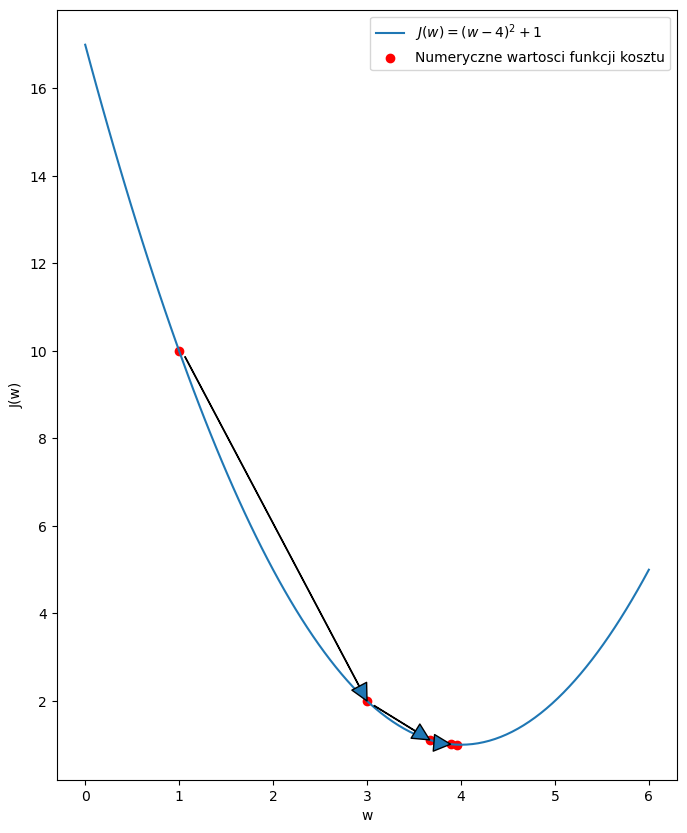

In [1194]:
x=np.linspace(0,6,100)
plt.figure(figsize=(8,10))
plt.plot(x, JFunction(x), label = fr"$J(w)=(w-4)^2+1$")
plt.scatter(w_ls, J_ls, color = 'red', label = "Numeryczne wartosci funkcji kosztu")
for i in range(n_iter-1):
    plt.annotate(" ", xy=(w_ls[i+1], J_ls[i+1]), xytext=(w_ls[i], J_ls[i]), arrowprops={"width": 0.3})
plt.xlabel('w')
plt.ylabel('J(w)')
plt.legend()
plt.show()

In [1195]:
lr = 4/3
w = 1
w_ls = [w]
J_ls = [JFunction(w)]
for i in range(n_iter):
    w = w - lr * JDerivative(w)
    w_ls.append(w)
    J_ls.append(JFunction(w))

w_ls

[1, 9.0, -4.333333333333332, 17.888888888888886, -19.148148148148138]

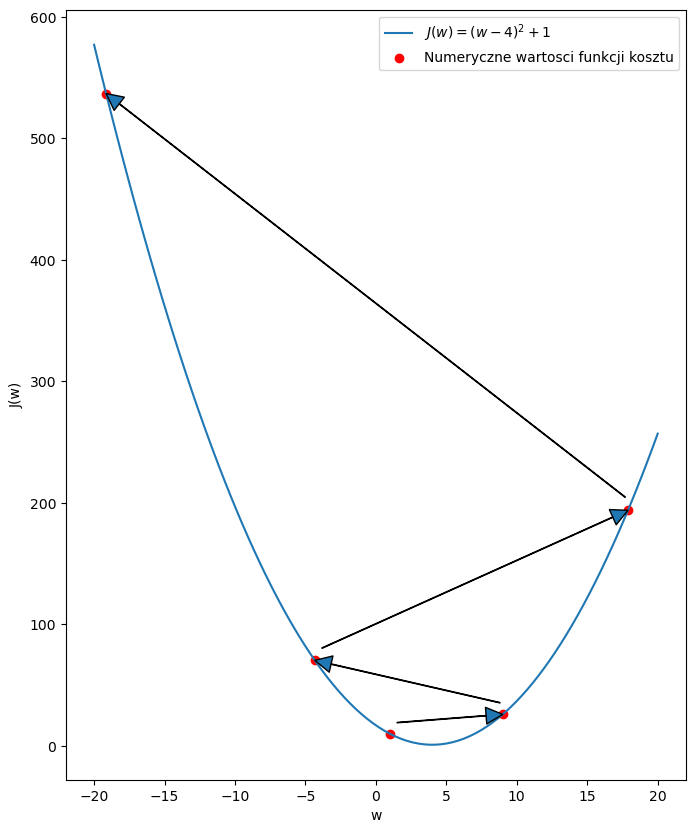

In [1196]:
x = np.linspace(-20,20,100)
plt.figure(figsize=(8,10))
plt.plot(x, JFunction(x), label = fr"$J(w)=(w-4)^2+1$")
plt.scatter(w_ls, J_ls, color = 'red', label = "Numeryczne wartosci funkcji kosztu")
for i in range(n_iter):
    plt.annotate(" ", xy=(w_ls[i+1], J_ls[i+1]), xytext=(w_ls[i], J_ls[i]), arrowprops={"width": 0.3})
plt.xlabel('w')
plt.ylabel('J(w)')
plt.legend()
plt.show()

In [1197]:
X = np.array([
    [1,-2,-1],
    [3,0.5,-3.2]
])

Y = np.array([
    [1,1,0]
])

In [1198]:
print(X.shape)
print(Y.shape)

(2, 3)
(1, 3)


In [1199]:
m=X.shape[1]
m

3

In [1200]:
w0 = np.array([
    [1],
    [2]
])
b0=1.5
w, b=w0, b0

In [1201]:
print(w.shape)

(2, 1)


In [1202]:
Z=np.matmul(w.T,X)+b
Z

array([[ 8.5,  0.5, -5.9]])

In [1203]:
for item in [w.T, X, np.matmul(w.T,X)]:
    print(item.shape)
print(b)

(1, 2)
(2, 3)
(1, 3)
1.5


In [1204]:
A=sigmoid(Z)
A

array([[0.99979657, 0.62245933, 0.00273196]])

In [1205]:
C = np.array([
    [1,2,3]
])
D = np.array([
    [2,3,4]
])

In [1206]:
C.shape

(1, 3)

In [1207]:
np.dot(C.reshape(-1), D.reshape(-1))

20

In [1208]:
J=(
    -1/m*(np.dot(Y.reshape(-1), np.log(A).reshape(-1))
    + np.dot((1-Y).reshape(-1), np.log(1-A).reshape(-1)))
)
J

0.15900537707692405

In [1209]:
1-Y

array([[0, 0, 1]])

In [1210]:
np.log(1-A).T

array([[-8.50020345e+00],
       [-9.74076984e-01],
       [-2.73569938e-03]])

In [1211]:
J=1/m*(np.matmul(-Y,np.log(A).T)-np.matmul(1-Y,np.log(1-A).T))
print(J)
print(J.shape)
print(J[0][0])

[[0.15900538]]
(1, 1)
0.15900537707692405


In [1212]:
dJdb = (A-Y).mean()
dJdb

-0.12500404500439652

In [1213]:
dJdw = 1/m*np.matmul(X, (A-Y).T)
dJdw

array([[ 0.25071532],
       [-0.06604096]])

In [1214]:
lr = 0.001
b = b - lr*dJdb
w = w - lr*dJdw

In [1215]:
print(f"b={b}")
print(f"w={w}")

b=1.5001250040450045
w=[[0.99974928]
 [2.00006604]]


In [1216]:
def LogisticRegressionBGD(X, Y, lr=0.009, iter = 10, w_init = None, b_init=None):
    n = X.shape[0]
    m = X.shape[1]
    if w_init is None:
        w = np.random.rand(n,1)
    else:
        w = w_init
    if b_init is None:
        b = np.random.rand()
    else:
        b = b_init
    b_ls = [b]
    w_ls = [w]
    J_ls = []

    for i in range(iter):
        Z = np.matmul(w.T,X)+b
        A = sigmoid(Z)
        J = 1/m*(np.matmul(-Y,np.log(A).T)-np.matmul(1-Y,np.log(1-A).T))[0][0]
        dJdb = (A-Y).mean()
        dJdw = 1/m*np.matmul(X, (A-Y).T)
        b = b - lr*dJdb
        w = w - lr*dJdw
        b_ls.append(b)
        w_ls.append(w)
        J_ls.append(J)
    
    return b, w, b_ls, w_ls, J_ls

In [1217]:
n_iter = 100

In [1218]:
b_optimal, w_optimal, b_values_ls, w_values_ls, J_values_ls = LogisticRegressionBGD(
    X, Y, iter=n_iter, w_init=w0, b_init=b0
)

In [1219]:
print(f"b = {b_optimal}")
print(f"w = {w_optimal}")

b = 1.5948713189708588
w = [[0.80956046]
 [2.0508202 ]]


In [1220]:
b_values_ls[:5]

[1.5,
 1.5011250364050395,
 1.502245879053189,
 1.5033625495626266,
 1.5044750694627869]

In [1221]:
w_values_ls[:5]

[array([[1],
        [2]]),
 array([[0.99774356],
        [2.00059437]]),
 array([[0.9954955 ],
        [2.00118668]]),
 array([[0.99325577],
        [2.00177696]]),
 array([[0.99102432],
        [2.0023652 ]])]

In [1222]:
J_values_ls[:5]

[0.15900537707692405,
 0.15826114678694678,
 0.1575224128216089,
 0.15678912659059693,
 0.15606123993328513]

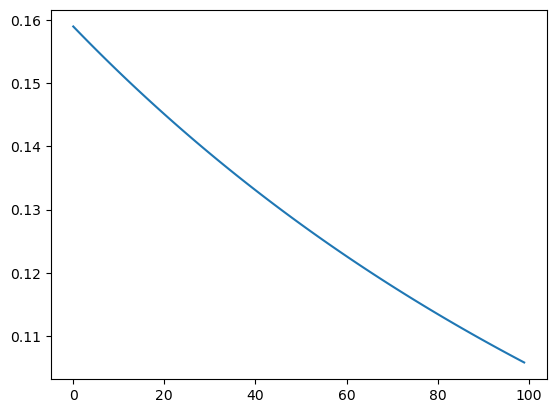

In [1223]:
plt.plot(J_values_ls)
plt.show()

In [1224]:
Y_pred = np.zeros((1,m))
print(Y_pred)
print(Y_pred.shape)

[[0. 0. 0.]]
(1, 3)


In [1225]:
Z = np.matmul(w_optimal.T, X) + b_optimal
A = sigmoid(Z)
A

array([[0.99980782, 0.73128668, 0.00308746]])

In [1226]:
for i in range(m):
    if A[0,i]>0.5:
        Y_pred[0,i]=1
    else:
        Y_pred[0,i]=0

Y_pred

array([[1., 1., 0.]])

In [1227]:
def predict(w,b,X, p_threshold = 0.5):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    Z = np.matmul(w.T, X) + b
    A = sigmoid(Z)
    for i in range(m):
        if A[0,i]>p_threshold:
            Y_pred[0,i]=1
        else:
            Y_pred[0,i]=0
    return Y_pred

In [1228]:
predict(w_optimal, b_optimal, X)

array([[1., 1., 0.]])

In [1229]:
X2 = np.random.rand(10,4)
Y2 = np.random.choice([0,1],4).reshape(1,-1)

print(f"X2 = {X2}")
print(f"Y2 = {Y2}")

X2 = [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249]]
Y2 = [[0 1 0 1]]


In [1230]:
b_optimal, w_optimal, b_values_ls, w_values_ls, J_values_ls = LogisticRegressionBGD(
    X2, Y2, iter=n_iter)

In [1231]:
print(f"b = {b_optimal}")
print(f"w = {w_optimal}")

b = 0.5541799438599664
w = [[-0.172268  ]
 [ 0.87569185]
 [ 0.15260235]
 [ 0.46046373]
 [ 0.17165103]
 [ 0.34040887]
 [ 0.43028941]
 [-0.05955589]
 [ 0.77930627]
 [ 0.57666349]]


In [1232]:
class LogisticRegressionsBGDCClassifier():
    def fit(self, X, Y, lr=0.009, iter=10, w_init=None, b_init=None, verbose=False):
        n = X.shape[0]
        m = X.shape[1]
        if w_init is None:
            w = np.random.rand(n,1)
        else:
            w = w_init
        if b_init is None:
            b = np.random.rand()
        else:
            b = b_init
        b_ls = [b]
        w_ls = [w]
        J_ls = []

        for i in range(iter):
            Z = np.matmul(w.T,X)+b
            A = sigmoid(Z)
            J = 1/m*(np.matmul(-Y,np.log(A).T)-np.matmul(1-Y,np.log(1-A).T))[0][0]
            dJdb = (A-Y).mean()
            dJdw = 1/m*np.matmul(X, (A-Y).T)
            b = b - lr*dJdb
            w = w - lr*dJdw
            b_ls.append(b)
            w_ls.append(w)
            J_ls.append(J)
        if verbose and (i % 100 == 0):
            print(f"cost after iteration {i}: {J.round(6)}")

        self.intercept_ = b
        self.coef_ = w
        self.costs_ = J_ls

    def predict(self, X, p_threshold = 0.5):
        m = X.shape[1]
        Y_pred = np.zeros((1,m))
        Z = np.matmul(self.coef_.T, X) + self.intercept_
        A = sigmoid(Z)
        for i in range(m):
            if A[0,i]>p_threshold:
                Y_pred[0,i]=1
            else:
                Y_pred[0,i]=0
        return Y_pred
    
    def predict_proba(self, X):
        Z=np.matmul(self.coef_.T,X)+self.intercept_
        A=sigmoid(Z)
        return A
    
    def score(self, X, Y):
        Y_pred = self.predict(X, p_threshold=0.5)
        return 1 - np.mean(np.abs(Y_pred - Y))

In [1233]:
lr_bgd = LogisticRegressionsBGDCClassifier()
lr_bgd.fit(X,Y, iter = n_iter, w_init=w0, b_init=b0)
print(lr_bgd.intercept_)
print(lr_bgd.coef_)

1.5948713189708588
[[0.80956046]
 [2.0508202 ]]


In [1234]:
lr_bgd.predict(X)

array([[1., 1., 0.]])

In [1235]:
lr_bgd.predict_proba(X)

array([[0.99980782, 0.73128668, 0.00308746]])

In [1236]:
lr_bgd.score(X, Y)

1.0

In [ ]:
# def LogisticRegressionSGD(X,Y,lr=0.009,iter=10,w_init = None, b_init=None)